In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2015y16 = pd.read_csv('espana-master/2010s/2015-16/es.1.csv')
new = df_laliga_2015y16['FT'].str.split('-',n=1,expand=True)
df_laliga_2015y16['GolesLocal']=new[0]
df_laliga_2015y16['GolesVisitante']=new[1]
df_laliga_2015y16

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Fri Aug 21 2015,Málaga CF,0-0,Sevilla FC,0,0
1,1,Sat Aug 22 2015,RCD La Coruña,0-0,Real Sociedad,0,0
2,1,Sat Aug 22 2015,RCD Espanyol,1-0,Getafe CF,1,0
3,1,Sat Aug 22 2015,Atlético Madrid,1-0,UD Las Palmas,1,0
4,1,Sat Aug 22 2015,Rayo Vallecano,0-0,Valencia CF,0,0
...,...,...,...,...,...,...,...
375,38,Sun May 15 2016,Málaga CF,4-1,UD Las Palmas,4,1
376,38,Sun May 15 2016,RCD Espanyol,4-2,SD Eibar,4,2
377,38,Sun May 15 2016,Rayo Vallecano,3-1,Levante UD,3,1
378,38,Sun May 15 2016,Real Betis,2-1,Getafe CF,2,1


In [3]:
df_laliga_2015y16['GolesLocal']=pd.to_numeric(df_laliga_2015y16['GolesLocal'], downcast="float")
df_laliga_2015y16['GolesVisitante']=pd.to_numeric(df_laliga_2015y16['GolesVisitante'], downcast="float")
df_laliga_2015y16['TotalGolesPartido'] = df_laliga_2015y16['GolesLocal']+df_laliga_2015y16['GolesVisitante']
df_laliga_2015y16

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Fri Aug 21 2015,Málaga CF,0-0,Sevilla FC,0.0,0.0,0.0
1,1,Sat Aug 22 2015,RCD La Coruña,0-0,Real Sociedad,0.0,0.0,0.0
2,1,Sat Aug 22 2015,RCD Espanyol,1-0,Getafe CF,1.0,0.0,1.0
3,1,Sat Aug 22 2015,Atlético Madrid,1-0,UD Las Palmas,1.0,0.0,1.0
4,1,Sat Aug 22 2015,Rayo Vallecano,0-0,Valencia CF,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
375,38,Sun May 15 2016,Málaga CF,4-1,UD Las Palmas,4.0,1.0,5.0
376,38,Sun May 15 2016,RCD Espanyol,4-2,SD Eibar,4.0,2.0,6.0
377,38,Sun May 15 2016,Rayo Vallecano,3-1,Levante UD,3.0,1.0,4.0
378,38,Sun May 15 2016,Real Betis,2-1,Getafe CF,2.0,1.0,3.0


In [4]:
df_laliga_2015y16['TotalGolesPartido'].sum()

1043.0

In [5]:
RealMadridL_4 = df_laliga_2015y16.loc[df_laliga_2015y16['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_4.reset_index(inplace=True)

RealMadridL_4

,index,GolesLocal
0,14,5.0
1,31,1.0
2,52,0.0
3,70,3.0
4,91,3.0
5,111,0.0
6,130,4.0
7,154,10.0
8,159,3.0
9,182,5.0


In [6]:
RealMadridV_4 = df_laliga_2015y16.loc[df_laliga_2015y16['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_4.reset_index(inplace=True)

RealMadridV_4

,index,GolesVisitante
0,6,0.0
1,21,6.0
2,46,2.0
3,69,1.0
4,81,3.0
5,109,2.0
6,127,2.0
7,149,0.0
8,177,2.0
9,207,1.0


In [8]:
Madrid_Tot_4=pd.merge(RealMadridL_4, RealMadridV_4, left_index=True, right_index=True)
Madrid_Tot_4

,index_x,GolesLocal,index_y,GolesVisitante
0,14,5.0,6,0.0
1,31,1.0,21,6.0
2,52,0.0,46,2.0
3,70,3.0,69,1.0
4,91,3.0,81,3.0
5,111,0.0,109,2.0
6,130,4.0,127,2.0
7,154,10.0,149,0.0
8,159,3.0,177,2.0
9,182,5.0,207,1.0


In [9]:
Madrid_Tot_4['GolesTotales']=Madrid_Tot_4['GolesLocal']+Madrid_Tot_4['GolesVisitante']
Madrid_Tot_4

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,14,5.0,6,0.0,5.0
1,31,1.0,21,6.0,7.0
2,52,0.0,46,2.0,2.0
3,70,3.0,69,1.0,4.0
4,91,3.0,81,3.0,6.0
5,111,0.0,109,2.0,2.0
6,130,4.0,127,2.0,6.0
7,154,10.0,149,0.0,10.0
8,159,3.0,177,2.0,5.0
9,182,5.0,207,1.0,6.0


In [10]:
Madrid_Tot_4['GolesLocal'].describe()

count    19.000000
mean      3.684211
std       2.495610
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: GolesLocal, dtype: float64

In [11]:
Madrid_Tot_4['GolesLocal'].sum()

70.0

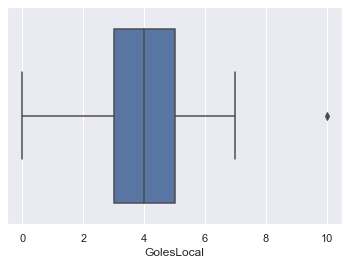

In [13]:
sns.boxplot(x=Madrid_Tot_4['GolesLocal'])
plt.show()

In [14]:
Madrid_Tot_4['GolesVisitante'].describe()

count    19.000000
mean      2.105263
std       1.486784
min       0.000000
25%       1.000000
50%       2.000000
75%       2.500000
max       6.000000
Name: GolesVisitante, dtype: float64

In [15]:
Madrid_Tot_4['GolesVisitante'].sum()

40.0

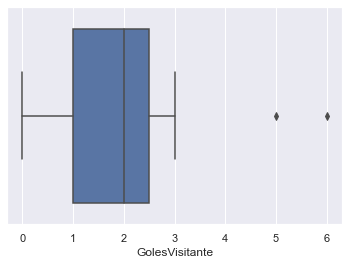

In [16]:
sns.boxplot(x=Madrid_Tot_4['GolesVisitante'])
plt.show()

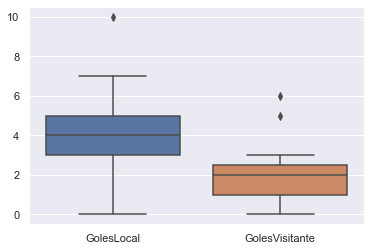

In [19]:
sns.boxplot(data=Madrid_Tot_4.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


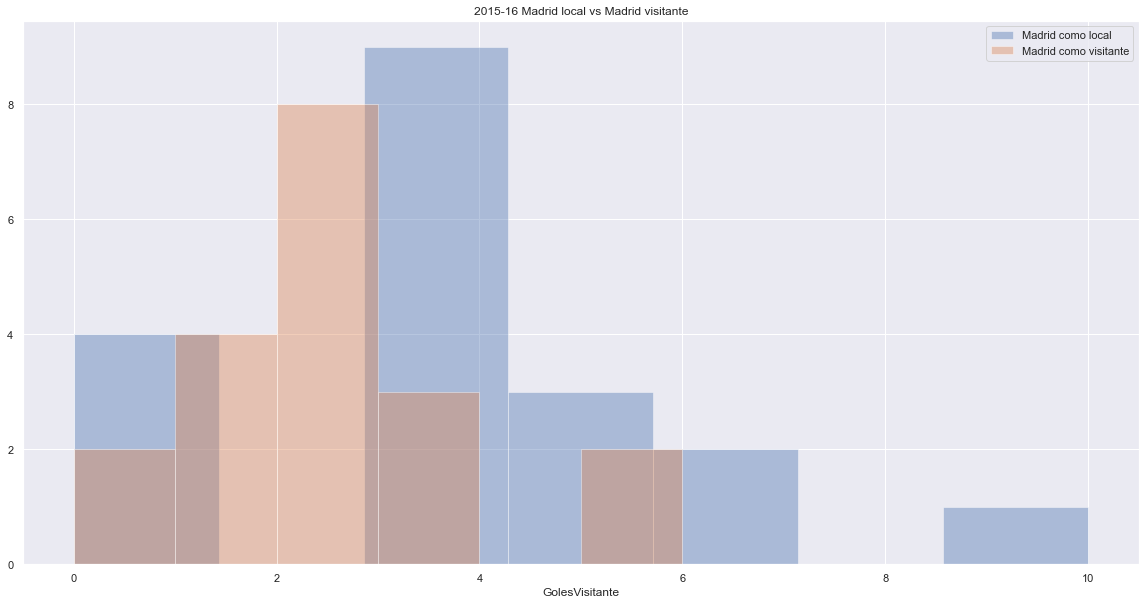

In [20]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_4['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_4['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2015-16 Madrid local vs Madrid visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


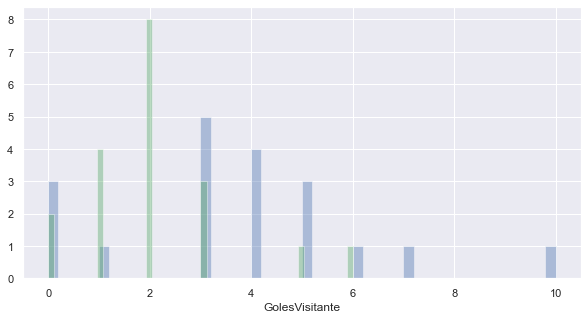

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_4['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_4['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

In [22]:
BarsaL_4 = df_laliga_2015y16.loc[df_laliga_2015y16['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_4.reset_index(inplace=True)
BarsaL_4

,index,GolesLocal
0,12,1.0
1,39,4.0
2,51,2.0
3,72,5.0
4,87,3.0
5,107,3.0
6,121,4.0
7,141,2.0
8,164,4.0
9,179,4.0


In [23]:
BarsaV_4 = df_laliga_2015y16.loc[df_laliga_2015y16['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_4.reset_index(inplace=True)
BarsaV_4

,index,GolesVisitante
0,5,1.0
1,23,2.0
2,44,1.0
3,61,1.0
4,94,2.0
5,111,4.0
6,132,1.0
7,169,0.0
8,200,2.0
9,224,2.0


In [39]:
BarsaTot_4=pd.merge(BarsaL_4, BarsaV_4, left_index=True, right_index=True)
BarsaTot_4['GolesTotales']=BarsaTot_4['GolesLocal']+BarsaTot_4['GolesVisitante']
BarsaTot_4

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,12,1.0,5,1.0,2.0
1,39,4.0,23,2.0,6.0
2,51,2.0,44,1.0,3.0
3,72,5.0,61,1.0,6.0
4,87,3.0,94,2.0,5.0
5,107,3.0,111,4.0,7.0
6,121,4.0,132,1.0,5.0
7,141,2.0,169,0.0,2.0
8,164,4.0,200,2.0,6.0
9,179,4.0,224,2.0,6.0


In [25]:
BarsaTot_4['GolesLocal'].sum()

67.0

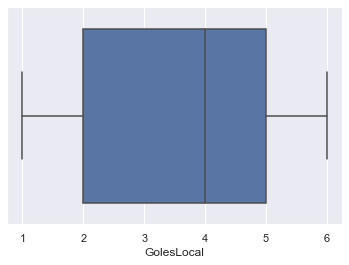

In [26]:
sns.boxplot(x=BarsaTot_4['GolesLocal'])
plt.show()

In [27]:
BarsaTot_4['GolesVisitante'].sum()

45.0

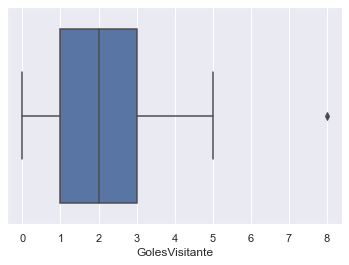

In [28]:
sns.boxplot(x=BarsaTot_4['GolesVisitante'])
plt.show()

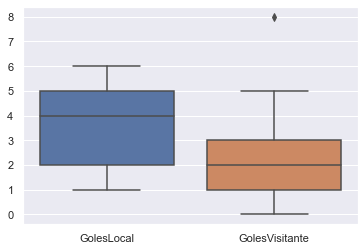

In [29]:
sns.boxplot(data=BarsaTot_4.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


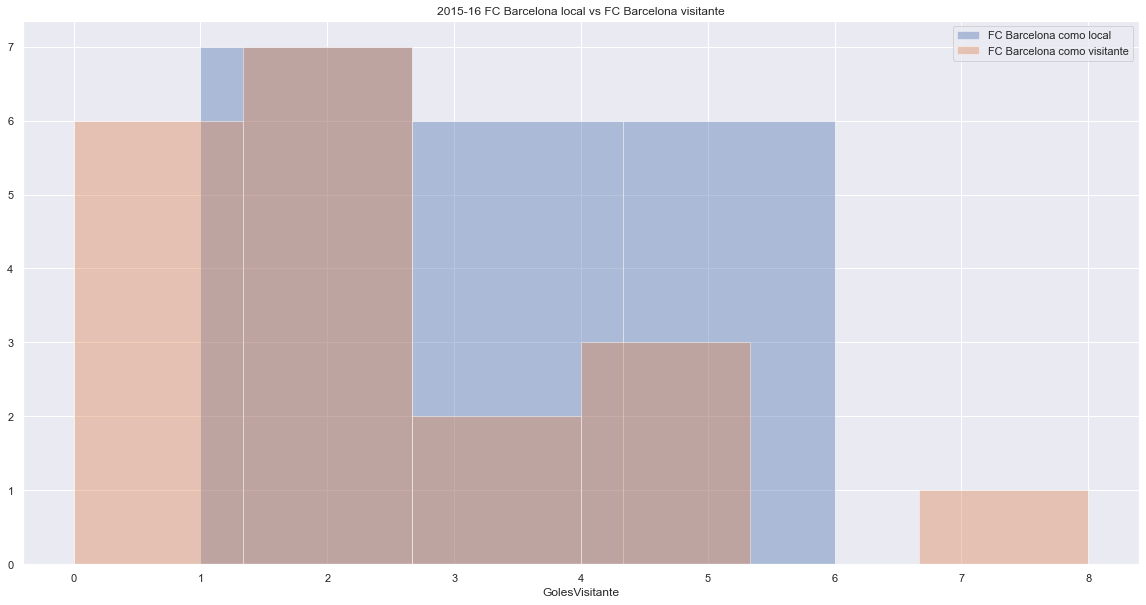

In [30]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_4['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_4['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2015-16 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2015-16 FC Barcelona local vs FC Barcelona visitante')

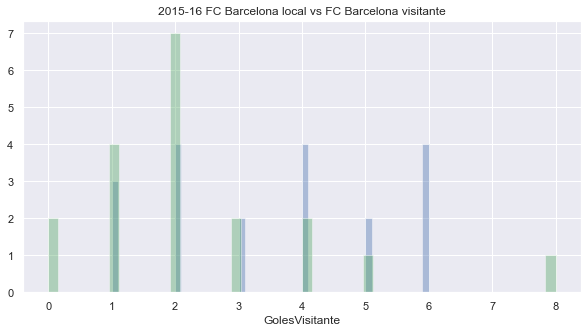

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_4['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_4['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2015-16 FC Barcelona local vs FC Barcelona visitante")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


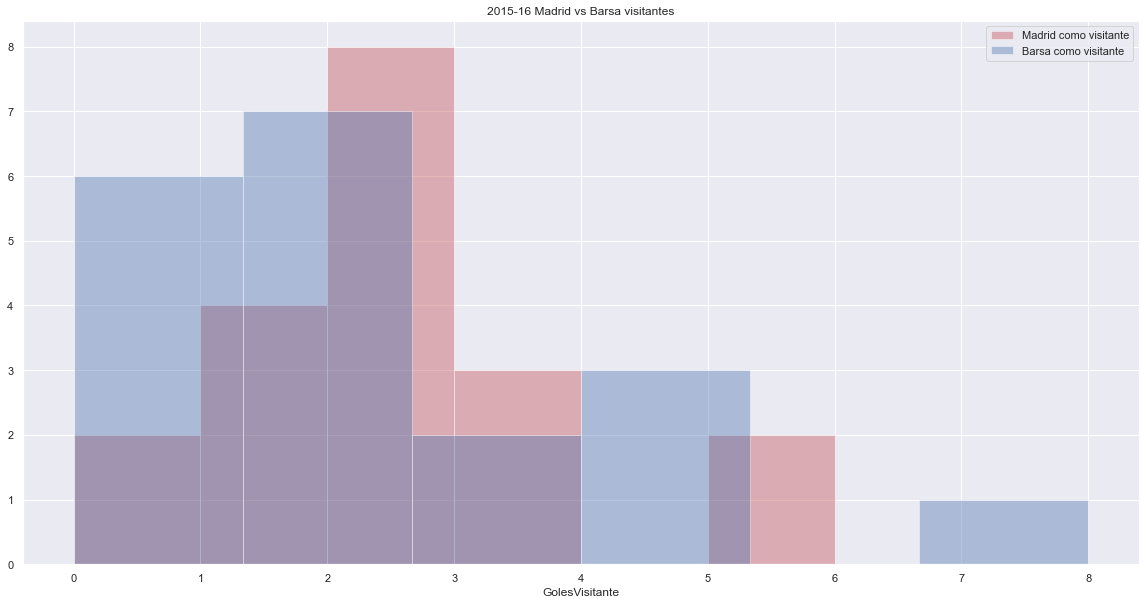

In [32]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_4['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_4['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2015-16 Madrid vs Barsa visitantes")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


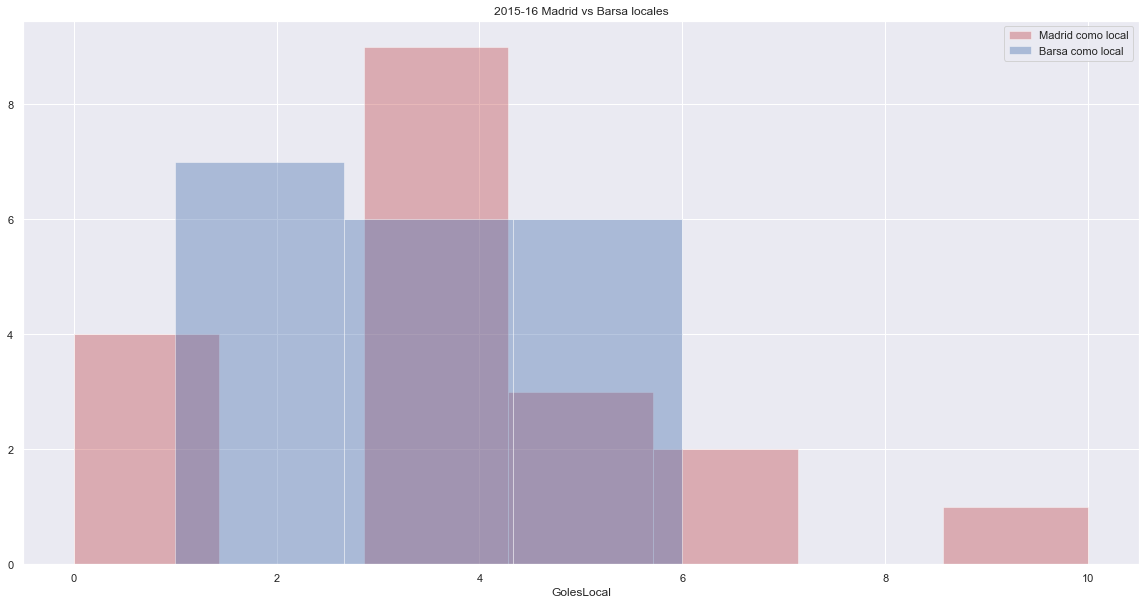

In [33]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_4['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_4['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2015-16 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


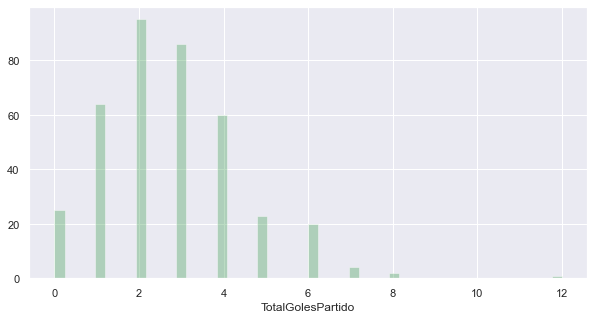

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2015y16['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);

<AxesSubplot:xlabel='Team 1', ylabel='GolesLocal'>

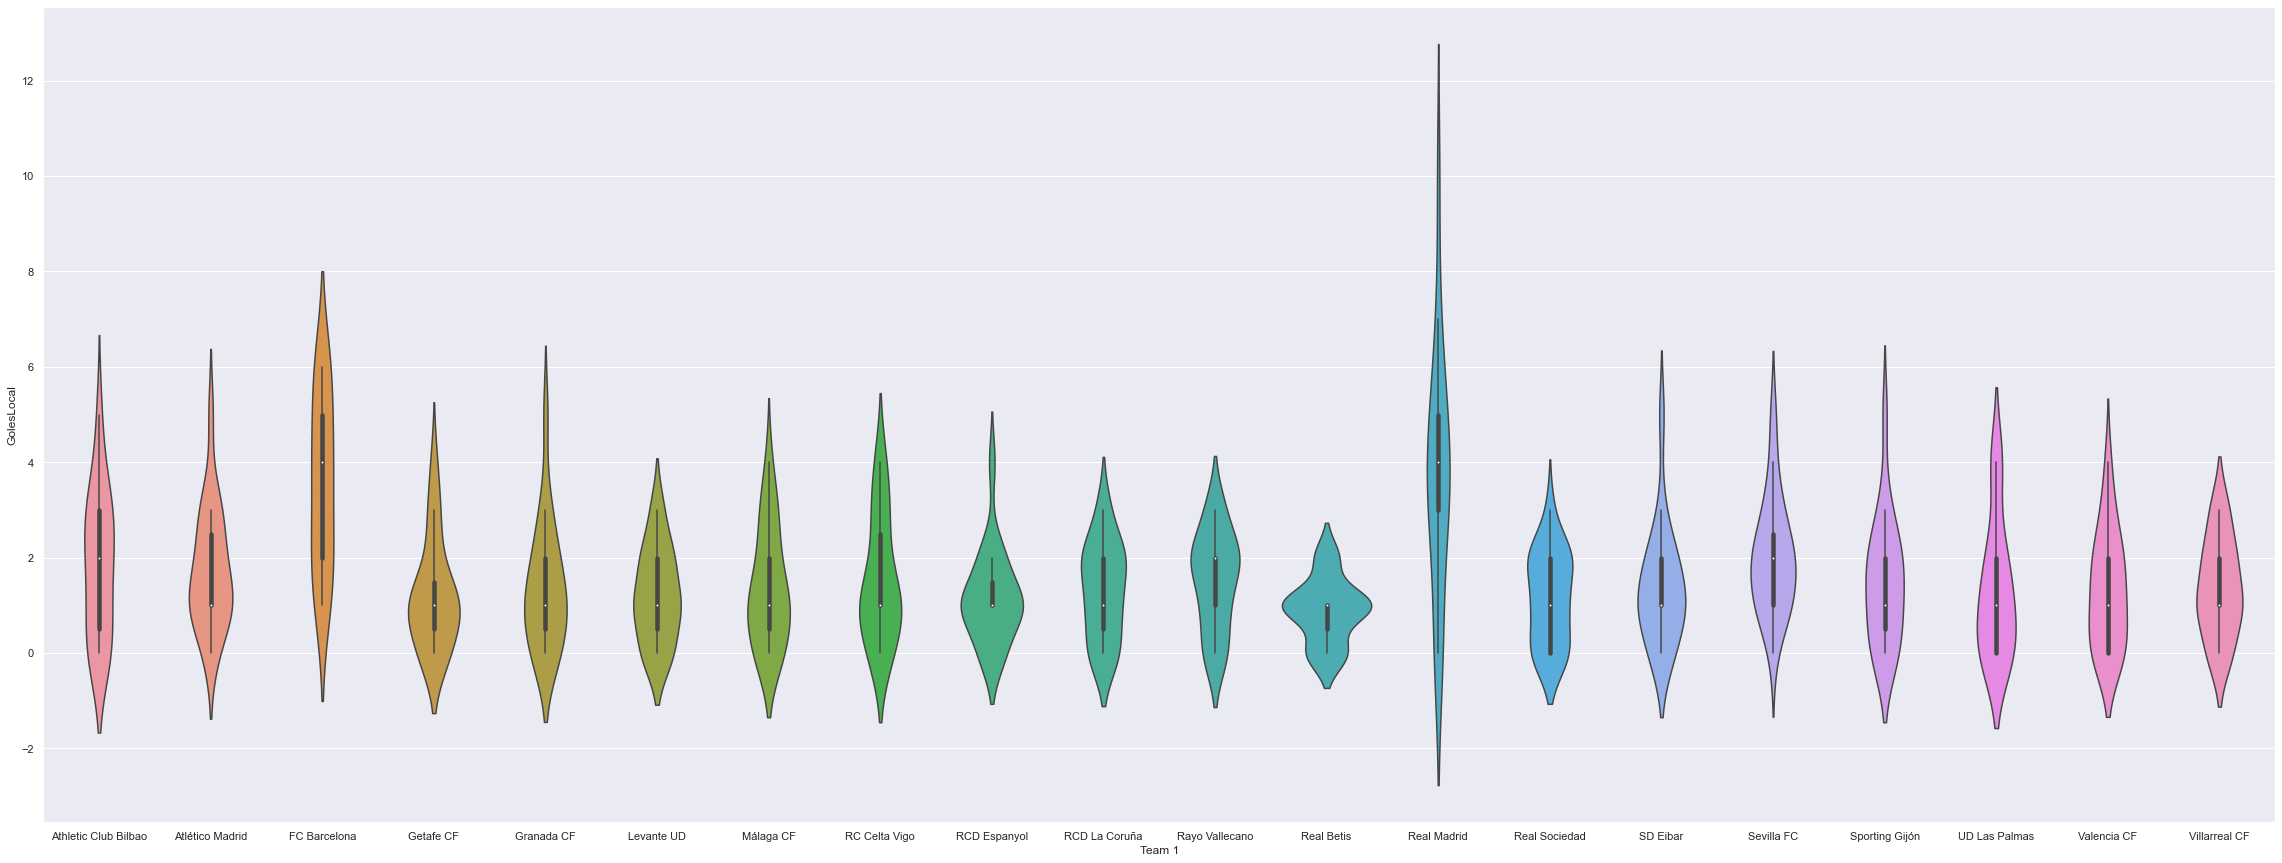

In [35]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2015y16['Team 1'].sort_values(), y=df_laliga_2015y16['GolesLocal'])

<AxesSubplot:xlabel='Team 2', ylabel='GolesVisitante'>

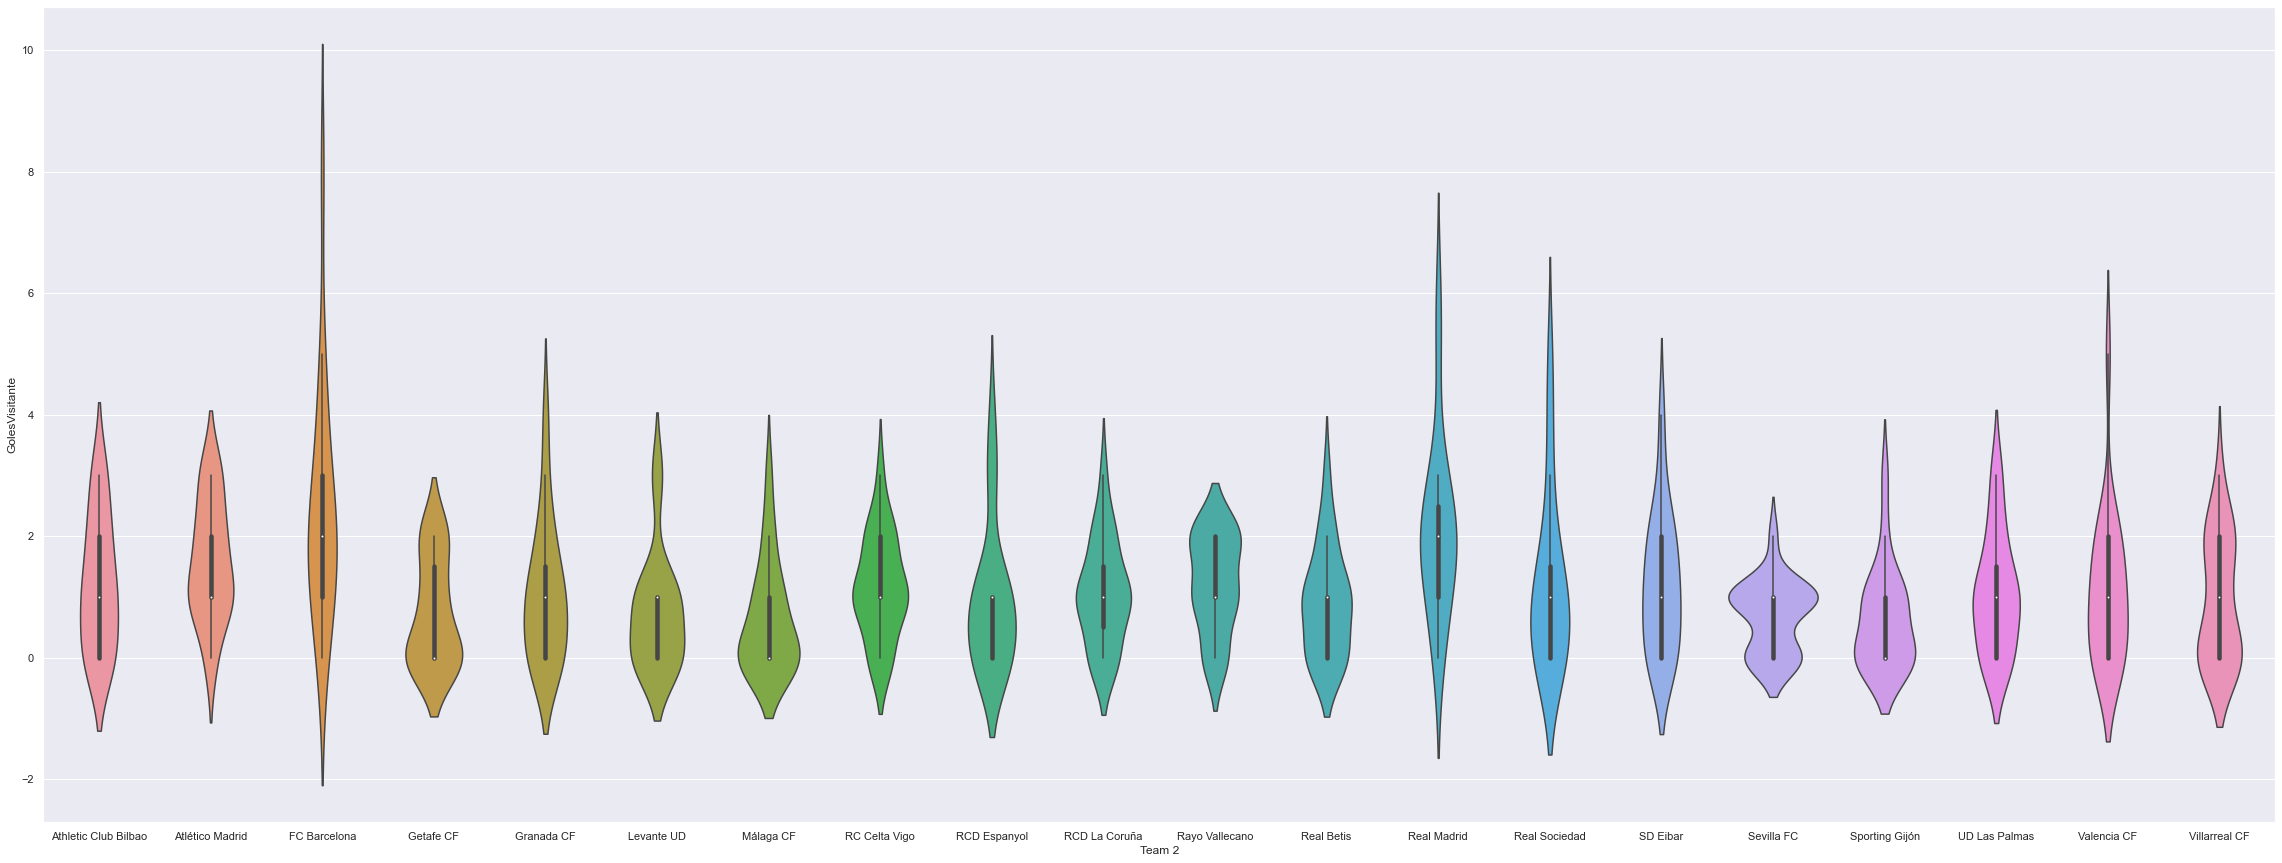

In [36]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2015y16['Team 2'].sort_values(), y=df_laliga_2015y16['GolesVisitante'])

Ganador del campeonato: FC Barcelona

In [37]:
Madrid_Tot_4['GolesTotales'].sum()

110.0

In [40]:
BarsaTot_4['GolesTotales'].sum()

112.0